# Mileage Prediction - A Regression Analysis Model

## Objective
The goal of this project is to accurately predict the fuel efficiency (mileage) of various car models using regression analysis techniques, thereby improving efficiency in mileage prediction.

## Data Source
The dataset for this project is sourced from StatLib, a repository maintained by Carnegie Mellon University, ensuring the availability of reliable and curated data for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Data

In [2]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

## Data Describe

In [3]:
data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

## Data Visualization

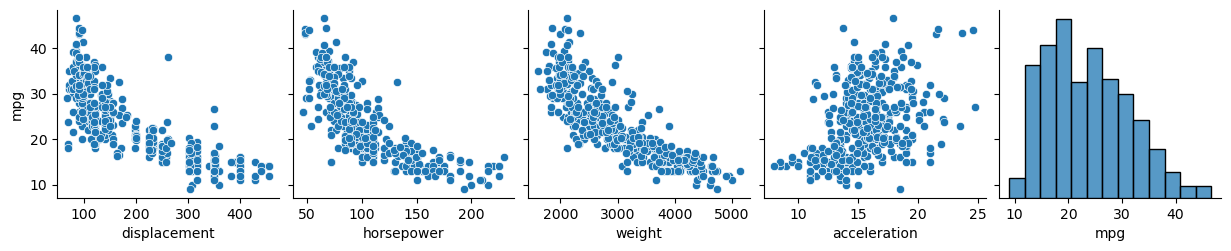

In [4]:
sns.pairplot(data,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

In [5]:
sns.regplot(x='displacement',y='mpg',data=data)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

##Data Pre-Processing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
data=data.dropna()

##Define Target Variable (y) and Feature Variables (X)

In [9]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [10]:
y=data['mpg']

In [11]:
y.shape

(392,)

In [12]:
X=data[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [13]:
X.shape

(392, 4)

In [14]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


## Train Test Split Data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

## Modelling

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
model.intercept_

45.10570942699842

In [19]:
model.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

In [20]:
y_pred=model.predict(X_test)

In [21]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [23]:
mean_absolute_error(y_test,y_pred)

3.328696864324411

In [24]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

# Prediction

In [25]:
y_pred=model.predict(X_test)

In [26]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

## Explanation
Data Collection: The dataset from The StatLibrary dataset comprises data on different car variables, including mileage, engine size, weight, horsepower, and more, collected for the purpose of analysis.

Data Preparation: Prior to analysis, the dataset requires thorough cleaning and organization. This entails the removal of any missing or inaccurate data, addressing outliers, and ensuring that the variables are properly formatted for regression analysis.

Variable Selection: Using domain knowledge or conducting exploratory data analysis, a subset of variables is chosen as potential predictors for mileage. These variables are selected based on their logical or theoretical relevance to mileage, indicating a plausible relationship between them.

Model Building: A regression model is constructed to estimate the relationship between the chosen predictor variables and mileage. There are different types of regression models that can be used, such as simple linear regression (when there is only one predictor) or multiple linear regression (when there are multiple predictors).

Model Estimation: A regression model is constructed to estimate the relationship between the chosen predictor variables and mileage. This can involve simple linear regression (one predictor) or multiple linear regression (multiple predictors).

Model Evaluation: The estimated regression model is evaluated to assess its goodness of fit and statistical significance. This involves analyzing statistical metrics such as the coefficient of determination (R-squared), p-values, and confidence intervals for the regression coefficients.

Prediction: Once the model is deemed acceptable, it can be used to predict the mileage for new or unseen data points. By inputting the values of the selected predictor variables into the regression equation, the model provides an estimated mileage value.

Model Validation: The model's predictive performance is assessed using validation techniques like cross-validation. This involves testing the accuracy of the model on a separate dataset that was not used during the model estimation process.